# ENC - master Humanités numériques

# Évaluation pour le cours d'apprentissage machine : question 1






## Question : CIFAR10
Modifiez le fichier Jupiter "cnn.ipynb"  permettant d'effectuer du deep Learning sur le jeu de données CIFAR10 en proposant 2 architectures alternatives dont une sans convolution.\
Présenter quelques exemples de mauvaises prédiction et commentez-les.\
Calculez la matrice de confusion pour chacune des architectures.\
Présentez également les courbes de précision comparant celles calculées sur les données d'entrainement et celles calculées sur les données tests. Commentez.

## On importe les différents modules :

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix

## On importe le jeu de données CIFAR10.

Chaque pixel est codé par une valeur comprise entre 0 et 255. On normalise cette valeur pour qu'elle soit comprise entre 0 et 1.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


On affiche les 25 premières images.

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Modèle 1 : modèle convolutionnaire (exemple du cours)

### On crée le modèle

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [62]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)              

### On compile et entraîne le modèle

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5102 - accuracy: 0.4491 - val_loss: 1.2260 - val_accuracy: 0.5591
Epoch 2/30
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1362 - accuracy: 0.5964 - val_loss: 1.0785 - val_accuracy: 0.6217
Epoch 3/30
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9975 - accuracy: 0.6502 - val_loss: 1.0410 - val_accuracy: 0.6342
Epoch 4/30
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9078 - accuracy: 0.6796 - val_loss: 0.9714 - val_accuracy: 0.6632
Epoch 5/30
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8366 - accuracy: 0.7070 - val_loss: 0.9208 - val_accuracy: 0.6782
Epoch 6/30
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7802 - accuracy: 0.7268 - val_loss: 0.9194 - val_accuracy: 0.6799
Epoch 7/30
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7299 - accuracy: 0.7436 - val_loss: 0.9198 -

On sauvegarde le modèle

In [0]:
model.save('cifar10_model1_20200401.h5')

In [65]:
cp cifar10_model1_20200401_a.hd5 drive/My\ Drive/eval_ia/.

cp: -r not specified; omitting directory 'cifar10_model1_20200401_a.hd5'


## Modèle 2 : modèle convolutionnaire avec paramètres modifiés

### On crée le modèle

In [0]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [0]:
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(10))

In [0]:
model2.summary()

### On compile et entraine le modèle

In [51]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 134s 86ms/step - loss: 1.0381 - accuracy: 0.6341 - val_loss: 0.9348 - val_accuracy: 0.6705
Epoch 2/30
1563/1563 [==============================] - 135s 87ms/step - loss: 0.9304 - accuracy: 0.6719 - val_loss: 0.9252 - val_accuracy: 0.6783
Epoch 3/30
1563/1563 [==============================] - 135s 86ms/step - loss: 0.8532 - accuracy: 0.6980 - val_loss: 0.8405 - val_accuracy: 0.7041
Epoch 4/30
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7919 - accuracy: 0.7199 - val_loss: 0.8641 - val_accuracy: 0.7035
Epoch 5/30
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7420 - accuracy: 0.7392 - val_loss: 0.8014 - val_accuracy: 0.7236
Epoch 6/30
1563/1563 [==============================] - 133s 85ms/step - loss: 0.6971 - accuracy: 0.7519 - val_loss: 0.8186 - val_accuracy: 0.7175
Epoch 7/30
1563/1563 [==============================] - 133s 85ms/step - loss: 0.6554 - accuracy: 0.7687 - val_loss: 0

### On sauvegarde le modèle

In [0]:
model2.save('cifar10_model2_20200401_a.h5')

In [0]:
cp -r cifar10_model2_20200401_a.h5 drive/My\ Drive/eval_ia/.

### On réessaye le même modèle sans dropout

In [0]:
model2b = models.Sequential()
model2b.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2b.add(layers.MaxPooling2D((2, 2)))
#model2b.add(layers.Dropout(0.25))
model2b.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2b.add(layers.MaxPooling2D((2, 2)))
#model2b.add(layers.Dropout(0.25))
model2b.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [0]:
model2b.add(layers.Flatten())
model2b.add(layers.Dense(512, activation='relu'))
#model2b.add(layers.Dropout(0.25))
model2b.add(layers.Dense(10))

In [0]:
model2b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2b = model2b.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

## Modèle 3 : modèle non convolutionnaire

### On crée le modèle

In [0]:
model3 = models.Sequential()
model3.add(layers.Flatten(input_shape=(32, 32, 3))),
model3.add(layers.Dense(32, activation='relu')),
model3.add(layers.Dense(32, activation='relu')),
model3.add(layers.Dense(10))

### On compile et entraîne le modèle

In [80]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model3.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
history3 = model3.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0946 - accuracy: 0.1823 - val_loss: 2.0409 - val_accuracy: 0.1956
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0475 - accuracy: 0.1932 - val_loss: 2.0324 - val_accuracy: 0.1954
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0360 - accuracy: 0.1961 - val_loss: 2.0068 - val_accuracy: 0.2088
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9946 - accuracy: 0.2262 - val_loss: 1.9631 - val_accuracy: 0.2412
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9384 - accuracy: 0.2576 - val_loss: 1.9375 - val_accuracy: 0.2617
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9258 - accuracy: 0.2658 - val_loss: 1.9242 - val_accuracy: 0.2664
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9199 - accuracy: 0.2672 - val_loss: 1.9185 - val_accuracy:

### On sauvegarde le modèle

In [0]:
model3.save('cifar10_model3_20200401_a.h5')

INFO:tensorflow:Assets written to: cifar10_model3.hd5/assets


In [0]:
cp -r cifar10_model3.hd5 drive/My\ Drive/eval_ia/.

## On évalue les trois modèles

In [0]:
predictions = model3.predict(test_images)

pred = np.argmax(predictions, axis=1)
pred

array([3, 8, 8, ..., 3, 6, 7])

In [0]:
df = pd.DataFrame({ 'actual': test_labels[:,0], 'predicted': pred } )
df['res'] = df['actual'] == df['predicted']
a = df.groupby(['actual','res']).count()
b = a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
b[b.index.get_level_values('res') == False]

,,predicted
actual,res,
0,False,55.5
1,False,58.6
2,False,82.8
3,False,69.8
4,False,75.5
5,False,79.1
6,False,47.0
7,False,43.3
8,False,43.9


"In summary, acc is the accuracy of a batch of training data and val_acc is the accuracy of a batch of testing data." (Internet)
c'est val_acc qui est le plus important.

Pbtique de l'overfitting => mémorisation des données d'entraînement, mais pas capable de mémoriser

changer la structure ?

Cela correspond à une sur-entrainement qui aboutit à une sorte de mémorisation des données d'entrainement sans capacité à généraliser

dans l'entrainement, les démarches sont accumulatives, améliorant énormément la performance, mais le modele dans ce cas là dépend largement les données entraînées, en cas de changement de données, le modèle ne serait pas aussi performant

attention notamment à si on augmente le nb d'epoch



petit conseil: network.add(layers.Dropout(rate=0.25)) # to prevent the overfitting

Cela permet un arret automatique à partir du moment que le décalage entre acc et val_acc depasse le rate de 0.25

c'est plutôt répétitif, après chaque sous-structure, surtout après conv2D

In [0]:
predictions = model.predict(test_images)

pred = np.argmax(predictions, axis=1)
pred

array([3, 8, 8, ..., 5, 4, 7])

In [0]:
print(class_names[np.argmax(predictions[1])])
print(class_names[test_labels[1, 0]])

ship
ship


In [0]:
df = pd.DataFrame({ 'actual': test_labels[:,0], 'predicted': pred } )
df['res'] = df['actual'] == df['predicted']
a = df.groupby(['actual','res']).count()
b = a.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
b[b.index.get_level_values('res') == False]

,,predicted
actual,res,
0,False,27.4
1,False,24.1
2,False,43.1
3,False,37.1
4,False,25.5
5,False,47.3
6,False,17.7
7,False,32.8
8,False,22.4


In [0]:
cm = confusion_matrix(test_labels[:,0], pred)
pd.DataFrame(cm, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,726,14,58,48,39,9,10,14,56,26
automobile,31,759,15,33,11,7,33,3,38,70
bird,41,1,569,101,113,66,73,30,5,1
cat,13,2,44,629,72,124,84,23,6,3
deer,7,2,60,81,745,24,52,25,2,2
dog,8,1,51,287,53,527,37,33,2,1
frog,2,1,40,73,38,14,823,5,4,0
horse,13,2,32,73,127,65,12,672,2,2
ship,68,20,25,43,25,9,14,2,776,18
truck,36,65,14,59,18,6,34,22,35,711


In [0]:
cm_nor_l = np.around(confusion_matrix(test_labels[:,0], pred, normalize='true') * 100, 0).astype(int) # en lignes
pd.DataFrame(cm_nor_l, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,73,1,6,5,4,1,1,1,6,3
automobile,3,76,2,3,1,1,3,0,4,7
bird,4,0,57,10,11,7,7,3,0,0
cat,1,0,4,63,7,12,8,2,1,0
deer,1,0,6,8,74,2,5,2,0,0
dog,1,0,5,29,5,53,4,3,0,0
frog,0,0,4,7,4,1,82,0,0,0
horse,1,0,3,7,13,6,1,67,0,0
ship,7,2,2,4,2,1,1,0,78,2
truck,4,6,1,6,2,1,3,2,4,71


In [0]:
cm_nor_c = np.around(confusion_matrix(test_labels[:,0], pred, normalize='pred') * 100, 0).astype(int) # en colonnes
pd.DataFrame(cm_nor_c, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,77,2,6,3,3,1,1,2,6,3
automobile,3,88,2,2,1,1,3,0,4,8
bird,4,0,63,7,9,8,6,4,1,0
cat,1,0,5,44,6,15,7,3,1,0
deer,1,0,7,6,60,3,4,3,0,0
dog,1,0,6,20,4,62,3,4,0,0
frog,0,0,4,5,3,2,70,1,0,0
horse,1,0,4,5,10,8,1,81,0,0
ship,7,2,3,3,2,1,1,0,84,2
truck,4,7,2,4,1,1,3,3,4,85


### On compare les courbes de précision



#### Modèle 1

In [66]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 4s - loss: 1.7405 - accuracy: 0.6843


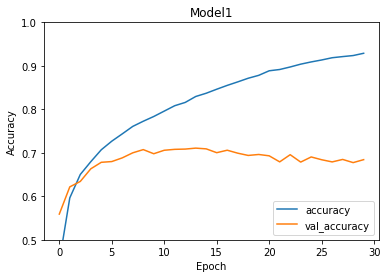

In [68]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('model1.png')

#### Modèle 2

In [69]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 5s - loss: 1.0756 - accuracy: 0.7283


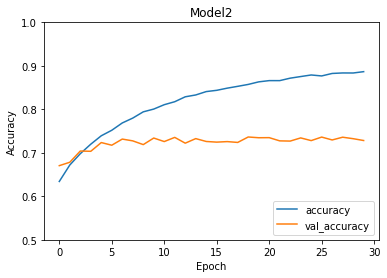

In [70]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('model2.png')

#### Modèle 3

In [82]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 1.8843 - accuracy: 0.2822


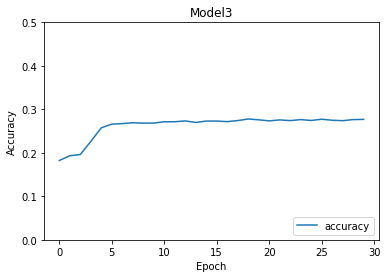

In [83]:
plt.plot(history3.history['accuracy'], label='accuracy')
#plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')
plt.savefig('model3.png')

### On calcule les matrices de confusion

#### Modèle 1

In [81]:
# on crée un vecteur contenant l'ensemble des prédictions
predictions1 = np.argmax(model.predict(test_images), axis=1)
predictions1

array([3, 8, 8, ..., 5, 1, 7])

In [87]:
cm = confusion_matrix(test_labels[:,0], predictions1)
pd.DataFrame(cm, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,733,17,54,20,27,17,7,15,75,35
automobile,24,775,5,12,6,8,10,7,31,122
bird,65,4,560,96,66,78,63,47,15,6
cat,29,10,65,500,60,198,60,49,18,11
deer,22,4,78,89,599,62,53,77,12,4
dog,17,2,46,174,47,624,27,49,9,5
frog,8,3,51,83,27,40,766,9,10,3
horse,21,9,32,55,60,87,8,704,5,19
ship,61,30,19,19,9,12,4,7,799,40
truck,47,59,12,23,5,7,12,18,34,783


In [90]:
cm_nor_l = np.around(confusion_matrix(test_labels[:,0], predictions1, normalize='true') * 100, 0).astype(int) # en lignes
pd.DataFrame(cm_nor_l, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,73,2,5,2,3,2,1,2,8,4
automobile,2,78,0,1,1,1,1,1,3,12
bird,6,0,56,10,7,8,6,5,2,1
cat,3,1,6,50,6,20,6,5,2,1
deer,2,0,8,9,60,6,5,8,1,0
dog,2,0,5,17,5,62,3,5,1,0
frog,1,0,5,8,3,4,77,1,1,0
horse,2,1,3,6,6,9,1,70,0,2
ship,6,3,2,2,1,1,0,1,80,4
truck,5,6,1,2,0,1,1,2,3,78


In [96]:
cm_nor_c = np.around(confusion_matrix(test_labels[:,0], predictions1, normalize='pred') * 100, 0).astype(int) # en colonnes
pd.DataFrame(cm_nor_c, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,71,2,6,2,3,2,1,2,7,3
automobile,2,85,1,1,1,1,1,1,3,12
bird,6,0,61,9,7,7,6,5,1,1
cat,3,1,7,47,7,17,6,5,2,1
deer,2,0,8,8,66,5,5,8,1,0
dog,2,0,5,16,5,55,3,5,1,0
frog,1,0,6,8,3,4,76,1,1,0
horse,2,1,3,5,7,8,1,72,0,2
ship,6,3,2,2,1,1,0,1,79,4
truck,5,6,1,2,1,1,1,2,3,76


#### Modèle 2

In [84]:
# on crée un vecteur contenant l'ensemble des prédictions
predictions2 = np.argmax(model2.predict(test_images), axis=1)
predictions2

array([3, 8, 8, ..., 5, 1, 7])

In [88]:
cm = confusion_matrix(test_labels[:,0], predictions2)
pd.DataFrame(cm, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,777,13,58,12,25,9,4,16,56,30
automobile,18,837,4,2,7,4,9,4,18,97
bird,58,4,673,57,86,29,47,33,5,8
cat,25,9,83,515,88,114,76,65,8,17
deer,13,4,85,65,709,18,44,53,6,3
dog,9,4,85,182,55,541,37,76,4,7
frog,8,4,53,44,26,8,833,16,6,2
horse,15,2,38,43,57,28,3,800,4,10
ship,82,42,13,14,9,4,6,9,795,26
truck,37,63,12,18,8,3,14,15,27,803


In [92]:
cm_nor_l = np.around(confusion_matrix(test_labels[:,0], predictions2, normalize='true') * 100, 0).astype(int) # en lignes
pd.DataFrame(cm_nor_l, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,78,1,6,1,2,1,0,2,6,3
automobile,2,84,0,0,1,0,1,0,2,10
bird,6,0,67,6,9,3,5,3,0,1
cat,2,1,8,52,9,11,8,6,1,2
deer,1,0,8,6,71,2,4,5,1,0
dog,1,0,8,18,6,54,4,8,0,1
frog,1,0,5,4,3,1,83,2,1,0
horse,2,0,4,4,6,3,0,80,0,1
ship,8,4,1,1,1,0,1,1,80,3
truck,4,6,1,2,1,0,1,2,3,80


In [95]:
cm_nor_c = np.around(confusion_matrix(test_labels[:,0], predictions2, normalize='pred') * 100, 0).astype(int) # en colonnes
pd.DataFrame(cm_nor_c, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,75,1,5,1,2,1,0,1,6,3
automobile,2,85,0,0,1,1,1,0,2,10
bird,6,0,61,6,8,4,4,3,1,1
cat,2,1,8,54,8,15,7,6,1,2
deer,1,0,8,7,66,2,4,5,1,0
dog,1,0,8,19,5,71,3,7,0,1
frog,1,0,5,5,2,1,78,1,1,0
horse,1,0,3,5,5,4,0,74,0,1
ship,8,4,1,1,1,1,1,1,86,3
truck,4,6,1,2,1,0,1,1,3,80


#### Modèle 3

In [85]:
# on crée un vecteur contenant l'ensemble des prédictions
predictions3 = np.argmax(model3.predict(test_images), axis=1)
predictions3

array([5, 9, 8, ..., 7, 6, 7])

In [89]:
cm = confusion_matrix(test_labels[:,0], predictions3)
pd.DataFrame(cm, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,476,25,0,28,11,16,30,121,243,50
automobile,45,298,0,49,10,16,65,86,178,253
bird,146,26,0,67,188,30,199,296,31,17
cat,52,77,0,121,87,52,234,308,37,32
deer,68,22,0,53,275,35,244,264,28,11
dog,64,51,0,87,123,45,178,383,41,28
frog,7,48,0,100,170,25,502,132,4,12
horse,66,34,0,94,132,48,115,401,60,50
ship,289,60,0,25,6,11,7,88,403,111
truck,58,218,0,42,10,8,52,71,240,301


In [93]:
cm_nor_l = np.around(confusion_matrix(test_labels[:,0], predictions3, normalize='true') * 100, 0).astype(int) # en lignes
pd.DataFrame(cm_nor_l, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,48,2,0,3,1,2,3,12,24,5
automobile,4,30,0,5,1,2,6,9,18,25
bird,15,3,0,7,19,3,20,30,3,2
cat,5,8,0,12,9,5,23,31,4,3
deer,7,2,0,5,28,4,24,26,3,1
dog,6,5,0,9,12,4,18,38,4,3
frog,1,5,0,10,17,2,50,13,0,1
horse,7,3,0,9,13,5,12,40,6,5
ship,29,6,0,2,1,1,1,9,40,11
truck,6,22,0,4,1,1,5,7,24,30


In [94]:
cm_nor_c = np.around(confusion_matrix(test_labels[:,0], predictions3, normalize='pred') * 100, 0).astype(int) # en colonnes
pd.DataFrame(cm_nor_c, index=class_names, columns=class_names)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,37,3,0,4,1,6,2,6,19,6
automobile,4,35,0,7,1,6,4,4,14,29
bird,11,3,0,10,19,10,12,14,2,2
cat,4,9,0,18,9,18,14,14,3,4
deer,5,3,0,8,27,12,15,12,2,1
dog,5,6,0,13,12,16,11,18,3,3
frog,1,6,0,15,17,9,31,6,0,1
horse,5,4,0,14,13,17,7,19,5,6
ship,23,7,0,4,1,4,0,4,32,13
truck,5,25,0,6,1,3,3,3,19,35
